In [2]:
"""
Zadanie 2.

Przygotuj chmurę słów (lub wykres kolumnowy dla 50 najczęściej używanych słów) w oparciu o *bag-of-words*. Dla pozyskanych przez Ciebie dokumentów (w języku angielskim). Korpus ma odzwierciedlać pewną dychotomię - konflikt, dyskusję dwóch stron pewnego zjawiska np: zmian klimatycznych, lockdownu, ulubionego sportu (rugby vs. piłka nożna). Mogą to być: teksty tweetów na wybrane tematy (min 1000 tweetów dla każdej strony); dwóch grup artykułów (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów); wypowiedzi dwóch ekspertów czy polityków (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów).

Analizę wykonaj w dwóch wersjach:

1. dwa teksty traktowane są osobno - jako dwa osobne korpusy, przygotuj dwie wizualizacje dla każdej strony osobno.
2. dwa teksty traktowane są jako jeden i wykonaj wizualizację prezentującą:

    - termów charakterystycznych dla każdej ze stron (termy pojawiające się w wypowiedziach jednej strony ale nie pojawiające się w wypowiedziach drugiej strony),
    - termów wspólnych dla dwóch stron (termy pojawiające się w wypowiedziach jednej i drugiej strony jednocześnie).
"""

'\nZadanie 2.\n\nPrzygotuj chmurę słów (lub wykres kolumnowy dla 50 najczęściej używanych słów) w oparciu o *bag-of-words*. Dla pozyskanych przez Ciebie dokumentów (w języku angielskim). Korpus ma odzwierciedlać pewną dychotomię - konflikt, dyskusję dwóch stron pewnego zjawiska np: zmian klimatycznych, lockdownu, ulubionego sportu (rugby vs. piłka nożna). Mogą to być: teksty tweetów na wybrane tematy (min 1000 tweetów dla każdej strony); dwóch grup artykułów (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów); wypowiedzi dwóch ekspertów czy polityków (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów).\n\nAnalizę wykonaj w dwóch wersjach:\n\n1. dwa teksty traktowane są osobno - jako dwa osobne korpusy, przygotuj dwie wizualizacje dla każdej strony osobno.\n2. dwa teksty traktowane są jako jeden i wykonaj wizualizację prezentującą:\n\n    - termów charakterystycznych dla każdej ze stron (termy pojawiające się w wypowiedziach jednej strony ale nie pojawiające się w wypowiedziach drugie

In [3]:
import twint
import nest_asyncio
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('SnowballStemmer')

nest_asyncio.apply()

In [4]:
#Funkcja pobierająca dane za pomocą biblioteki twint
def get_data(query, limit):
    c = twint.Config()
    c.Search = query
    c.Lang = 'en'
    c.Limit = limit
    c.Pandas = True
    twint.run.Search(c)
    tweets = twint.storage.panda.Tweets_df
    return tweets

In [5]:
#Funkcja oczyszczająca tweety
def cleaned_tweets(tweet):
    # normalizacja tekstu
    temp = re.sub("\s{2,}", " ", tweet) #usunięcie podwójnych spacji
    temp = re.sub("(\r\n|\r|\n)", " ", temp) #usunięcie przerw między słowami, entery
    temp = temp.lower() #zamienia wszystkie znaki na małe litery
    temp = re.sub("rt", "", temp) #usunięcie retweetów
    temp = re.sub("&amp", "", temp) #usunięcie kodu htmlowego
    temp = re.sub("#[a-z,A-Z]*", "", temp) #usunięcie hasztagów
    temp = re.sub("@\w+", "", temp) #usunięcie wzmianek, oznaczeń, tagowań
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("http(s?)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) #usunięcie znaków specjalnych
    temp = re.sub("\d", "", temp) #usunięcie cyfr
    temp = re.sub("\s{2,}", " ", temp) #ponowne usunięcie podwójnych spacji
    temp = temp.strip() #usunięcie spacji lub odstępów na końcach tekstu
    
    #usunięcie duplikatów ze zbioru
    words_set = set(temp.split())
    words_list = list(words_set)
    
    #tokenizacja
    tokens = nltk.word_tokenize(" ".join(words_list))
    
    #tworzenie listy stop słów
    stopwords = ["a", "able", "about", "across", "after", "all", "almost", "also", "am", "among", "an", "and", "any", "are", "as", "at", "be", "because", "been", "but", "by", "can", "cannot", "could", "dear", "did", "do", "does", "either", "else", "ever", "every", "for", "from", "get", "got", "had", "has", "have", "he", "her", "hers", "him", "his", "how", "however", "i", "if", "in", "into", "is", "it", "its", "just", "least", "let", "like", "likely", "may", "me", "might", "most", "must", "my", "neither", "no", "nor", "not", "of", "off", "often", "on", "only", "or", "other", "our", "own", "rather", "said", "say", "says", "she", "should", "since", "so", "some", "than", "that", "the", "their", "them", "then", "there", "these", "they", "this", "tis", "to", "too", "twas", "us", "wants", "was", "we", "were", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "would", "yet", "you", "your"]
    stopwords = stopwords + ["brexit", "remain", "s", "t", " ", "ga", "po", "yr", "b"]
    temp = " ".join([word for word in temp.split() if word not in stopwords])
    
    #stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in tokens if not token in stopwords]
    
    return stemmed_tokens

In [6]:
# Definicja funkcji generującej chmurę słów
def generate_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
    wordcloud.generate(data)
    plt.figure(figsize = (8, 8), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [7]:
# pobranie tweetów na temat Brexitu
brexit_tweets = get_data("Brexit", 1000)
# pobranie tweetów na temat zostania w UE
remain_tweets = get_data("Remain", 1000)

1643200478560256001 2023-04-04 12:34:57 +0200 <MrBrexitHanky> @GolfWomenMag Congratulations to the latest women's winner in Australia 👏  https://t.co/Ob6QWyvra1
1643200414165114880 2023-04-04 12:34:42 +0200 <ftmsafc1973> @MatthewStadlen @mrjamesob He is the embodiment of education not equating to intelligence. Exhibit A is Brexit. Nothing further needed.
1643200411841581057 2023-04-04 12:34:42 +0200 <thierry_eyere> Si j'étais pour le Brexit c'était pour annuler les accords commerciaux...... Jesus Christ
1643200379914539008 2023-04-04 12:34:34 +0200 <Realist1974> @king79_tom @Arron_banks Explain what? You asked can you work or retire to Spain? I’ve told you my friend has, and it was since Brexit. Do your own homework if that is your intention.
1643200377448288257 2023-04-04 12:34:33 +0200 <MintyTeaboy> @darrengrimes_ Does he reckon we'll forget about his anti-Brexit stance too? That’s what’ll get him elected.
1643200317872324608 2023-04-04 12:34:19 +0200 <ForeverBrexit> Why not behead t

In [8]:
# oczyszczenie tweetów na temat Brexit
brexit_cleaned_tweets = [cleaned_tweets(tweet) for tweet in brexit_tweets["tweet"]]
# oczyszczenie tweetów na temat Remain
remain_cleaned_tweets = [cleaned_tweets(tweet) for tweet in remain_tweets["tweet"]]

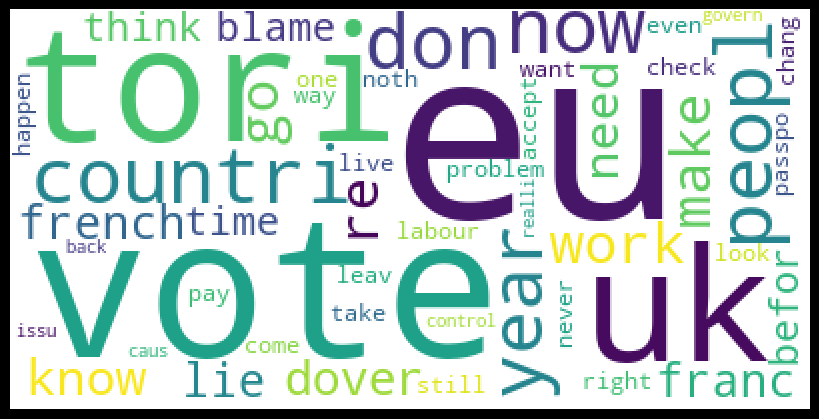

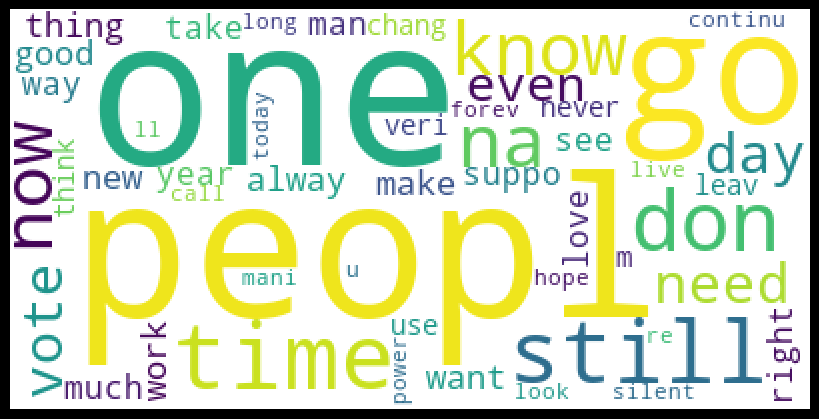

In [9]:
# stworzenie jednego tekstu na temat Brexit
brexit_text = " ".join([" ".join(tweet) for tweet in brexit_cleaned_tweets])
# stworzenie jednego tekstu na temat Remain
remain_text = " ".join([" ".join(tweet) for tweet in remain_cleaned_tweets])

# generowanie chmur słów
generate_wordcloud(brexit_text) # chmura słów dla Brexit
generate_wordcloud(remain_text) # chmura słów dla Remain

In [10]:
def count_words(text):
    word_counts = {}
    for tweet in text:
        for word in tweet:
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1
    return word_counts

         Word  Count
149        eu    118
66       vote    116
91         uk     87
247      tori     84
294      more     75
55      peopl     70
278   countri     64
98        now     63
292       don     61
11       need     59
494      year     57
464    french     56
32       work     54
317     franc     54
513        go     54
154     dover     54
72         re     53
56       make     52
290     think     51
189      time     51
90       know     51
357        up     50
171    happen     49
118     right     48
47        lie     48
172     befor     47
173     blame     47
492   problem     45
105       out     45
93     passpo     43
696       one     43
755     check     42
476      want     42
603      over     42
791         “     41
77     accept     41
1246     live     40
238    labour     39
112      caus     39
463      back     39
83        way     38
779      even     38
712     chang     38
130      take     38
147     still     38
451        be     37
797         ”

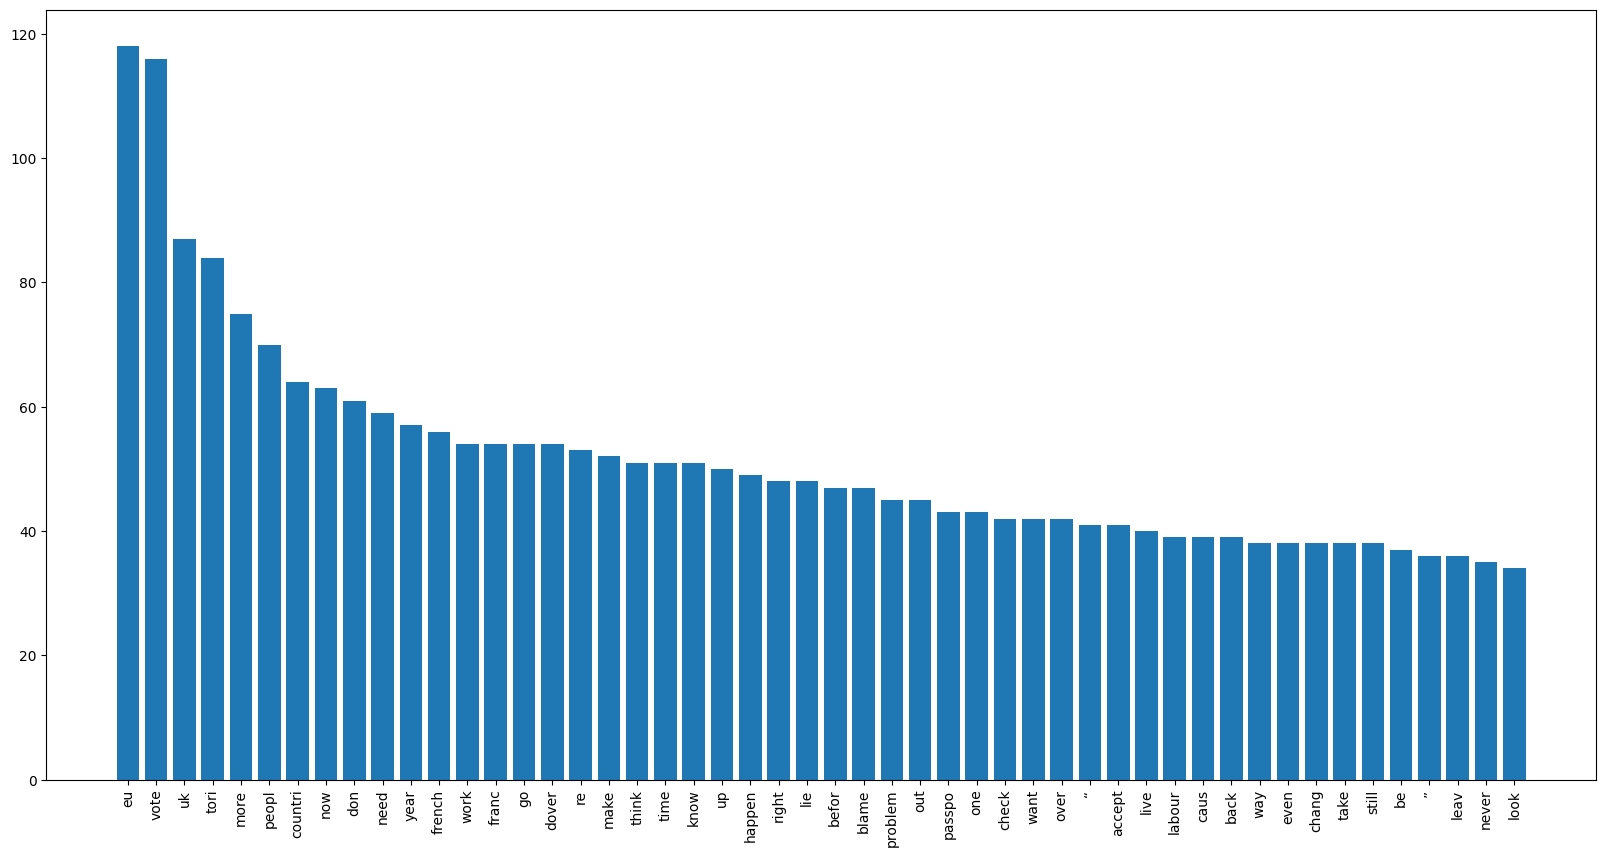

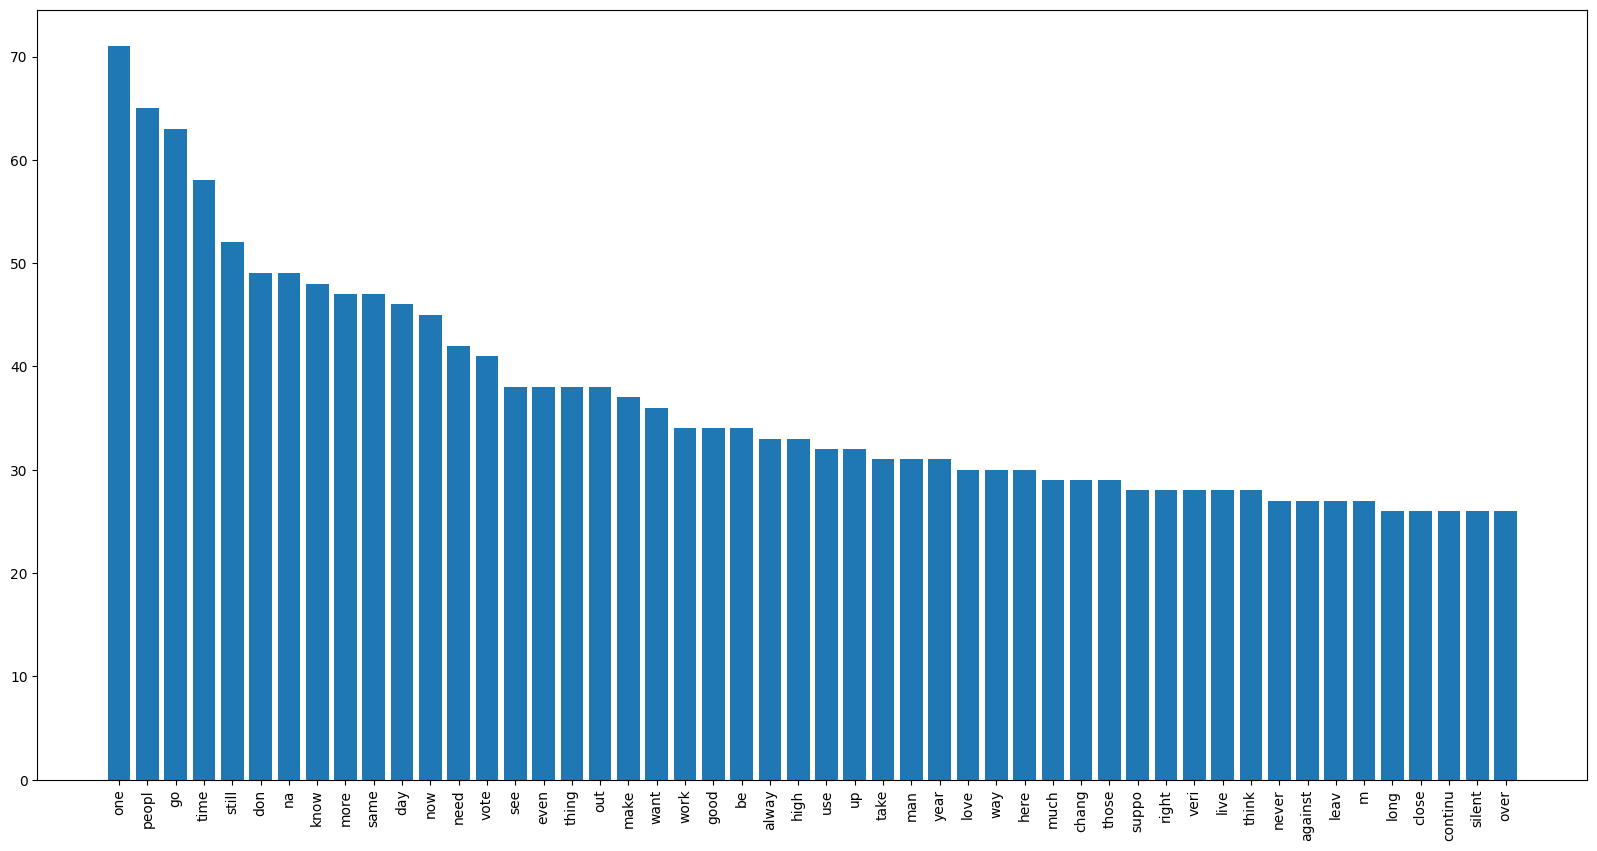

In [11]:
# policzenie słów dla Brexit
brexit_word_counts = count_words(brexit_cleaned_tweets)
# policzenie słów dla Remain
remain_word_counts = count_words(remain_cleaned_tweets)

# wyświetlenie 50 najczęściej używanych słów dla Brexit
brexit_top_50 = pd.DataFrame(list(brexit_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(brexit_top_50)

# wyświetlenie 50 najczęściej używanych słów dla Remain
remain_top_50 = pd.DataFrame(list(remain_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(remain_top_50)

# wykres kolumnowy dla 50 najczęściej używanych słów dla Brexit
plt.figure(figsize=[20,10])
plt.bar(brexit_top_50["Word"], brexit_top_50["Count"])
plt.xticks(rotation=90)
plt.show()

# wykres kolumnowy dla 50 najczęściej używanych słów dla Remain
plt.figure(figsize=[20,10])
plt.bar(remain_top_50["Word"], remain_top_50["Count"])
plt.xticks(rotation=90)
plt.show()

In [24]:
#Rozbicie tweetów dotyczących Brexitu i pozostania w UE na pojedyncze słowa

brexit_words = set(brexit_text.split())
remain_words = set(remain_text.split())

In [31]:
#Różnice zbiorów

diff_words1 = brexit_words - remain_words
diff_words2 = remain_words - brexit_words

In [ ]:
#Część wspólna zbiorów

common_words = brexit_words.intersection(remain_words)

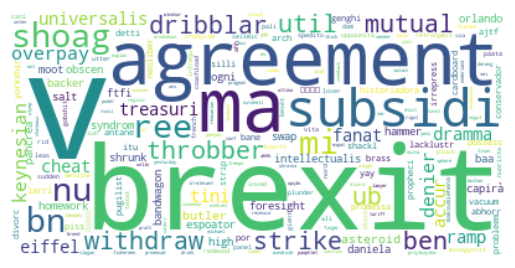

In [32]:
#CHmura słów dla zbioru Brexit\Remain

wordcloud = WordCloud(background_color="white").generate(" ".join(diff_words1))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

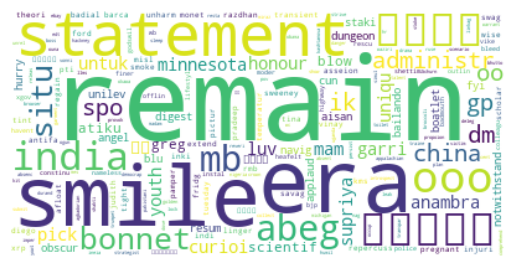

In [33]:
#Chmura słów dla zbioru Remain\Brexit

wordcloud = WordCloud(background_color="white").generate(" ".join(diff_words2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

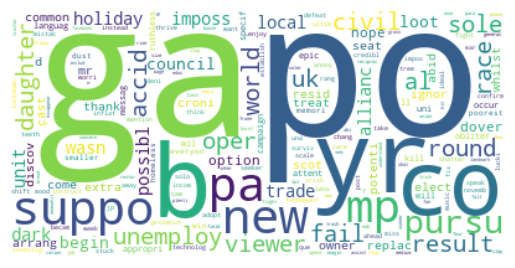

In [28]:
#Chmura słów dla części wspólnej z obu zbiorów

wordcloud = WordCloud(background_color="white").generate(" ".join(common_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()